In [1]:
from typing import Any, Union, List, Tuple
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, PredefinedSplit
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, median_absolute_error, f1_score

In [2]:
feature_columns = list([
    'SPY_1DAVGRET', 'SPY_1MRET', 'SPY_1MAVGRET', 'SPY_6MAVGRET', 'SPY_1YRET', 'SPY_1YAVGRET', 'SPY_1DVOL', 'SPY_1WVOL', 'SPY_1MVOL',
    'IWV_1DAVGRET', 'IWV_1MRET', 'IWV_1MAVGRET', 'IWV_6MAVGRET', 'IWV_1YRET', 'IWV_1YAVGRET', 'IWV_1DVOL', 'IWV_1WVOL', 'IWV_1MVOL',
    'QQQ_1DAVGRET', 'QQQ_1MRET', 'QQQ_1MAVGRET', 'QQQ_6MAVGRET', 'QQQ_1YRET', 'QQQ_1YAVGRET', 'QQQ_1DVOL', 'QQQ_1WVOL', 'QQQ_1MVOL',
    'IYF_1DAVGRET', 'IYF_1MRET', 'IYF_1MAVGRET', 'IYF_6MAVGRET', 'IYF_1YRET', 'IYF_1YAVGRET', 'IYF_1DVOL', 'IYF_1WVOL', 'IYF_1MVOL',
    'XRT_1DAVGRET', 'XRT_1MRET', 'XRT_1MAVGRET', 'XRT_6MAVGRET', 'XRT_1YRET', 'XRT_1YAVGRET', 'XRT_1DVOL', 'XRT_1WVOL', 'XRT_1MVOL',
    'XLP_1DAVGRET', 'XLP_1MRET', 'XLP_1MAVGRET', 'XLP_6MAVGRET', 'XLP_1YRET', 'XLP_1YAVGRET', 'XLP_1DVOL', 'XLP_1WVOL', 'XLP_1MVOL',
    'XLU_1DAVGRET', 'XLU_1MRET', 'XLU_1MAVGRET', 'XLU_6MAVGRET', 'XLU_1YRET', 'XLU_1YAVGRET', 'XLU_1DVOL', 'XLU_1WVOL', 'XLU_1MVOL',
    'XLV_1DAVGRET', 'XLV_1MRET', 'XLV_1MAVGRET', 'XLV_6MAVGRET', 'XLV_1YRET', 'XLV_1YAVGRET', 'XLV_1DVOL', 'XLV_1WVOL', 'XLV_1MVOL',
    'IYT_1DAVGRET', 'IYT_1MRET', 'IYT_1MAVGRET', 'IYT_6MAVGRET', 'IYT_1YRET', 'IYT_1YAVGRET', 'IYT_1DVOL', 'IYT_1WVOL', 'IYT_1MVOL',
    'GLD_1DAVGRET', 'GLD_1MRET', 'GLD_1MAVGRET', 'GLD_6MAVGRET', 'GLD_1YRET', 'GLD_1YAVGRET', 'GLD_1DVOL', 'GLD_1WVOL', 'GLD_1MVOL',
    'SLV_1DAVGRET', 'SLV_1MRET', 'SLV_1MAVGRET', 'SLV_6MAVGRET', 'SLV_1YRET', 'SLV_1YAVGRET', 'SLV_1DVOL', 'SLV_1WVOL', 'SLV_1MVOL',
    'MXI_1DAVGRET', 'MXI_1MRET', 'MXI_1MAVGRET', 'MXI_6MAVGRET', 'MXI_1YRET', 'MXI_1YAVGRET', 'MXI_1DVOL', 'MXI_1WVOL', 'MXI_1MVOL',
    'IGE_1DAVGRET', 'IGE_1MRET', 'IGE_1MAVGRET', 'IGE_6MAVGRET', 'IGE_1YRET', 'IGE_1YAVGRET', 'IGE_1DVOL', 'IGE_1WVOL', 'IGE_1MVOL',
    'XLE_1DAVGRET', 'XLE_1MRET', 'XLE_1MAVGRET', 'XLE_6MAVGRET', 'XLE_1YRET', 'XLE_1YAVGRET', 'XLE_1DVOL', 'XLE_1WVOL', 'XLE_1MVOL',
    '3M_TBILL', 'CPI', 'VIX', 'INDP', 'USHY_ADJ', 'US_LEADING', '30Y_FRMTG', '15Y_FRMTG', 'CPI_URBAN', 
    'RETAIL', 'PHARMA', 'UNEMP', 'UNEMP_PERM', 'UNEMP_MEN', 'UNEMP_WMN', 'UNEMP_WHT', 'UNEMP_BLK', 
    'UNEMP_HIS', 'INC', 'INC_DISP', 'INC_DISP_PC', 'TAX_HIGH', 'TAX_LOW'
])

""" 
We will use all 25 target columns in the neural network, for now we will use only the SPY 1 month return

target_columns = list([
    'SPY_1MRET', 'IWV_1MRET', 'QQQ_1MRET', 'IYF_1MRET', 'XRT_1MRET', 'XLP_1MRET', 'XLU_1MRET', 
    'XLV_1MRET', 'IYT_1MRET', 'GLD_1MRET', 'SLV_1MRET', 'MXI_1MRET', 'IGE_1MRET', 'XLE_1MRET',
    '3M_TBILL', 'CPI', 'VIX', 'INDP', 'USHY_ADJ', '30Y_FRMTG', '15Y_FRMTG', 'RETAIL', 'PHARMA', 'UNEMP', 'INC'
])
"""
target_columns = list(['SPY_1MRET'])


# construct a dictionary with all market data in divided into sets and features/targets
market_data = dict({
    "X" : pd.read_pickle("data/market_data.zip").loc[:, feature_columns],
    "y" : pd.read_pickle("data/market_data.zip").loc[:, target_columns].shift(-30)  # shift back by 1 month
})
market_data["X_train"] = market_data["X"].loc['2008-01-01':'2016-12-31', :]
market_data["y_train"] = market_data["y"].loc['2008-01-01':'2016-12-31', :]
market_data["X_test"] = market_data["X"].loc['2017-01-01':'2020-12-31', :]
market_data["y_test"] = market_data["y"].loc['2017-01-01':'2020-12-31', :]
market_data["X"] = market_data["X"].loc['2007-01-01':'2020-12-31', :]
market_data["y"] = market_data["y"].loc['2007-01-01':'2020-12-31', :]

# Create split on train_all with -1 for training data and 0 for validation data (data after '2015-01-01')
split = PredefinedSplit(test_fold=[-1 if i else 0 for i in '2015-01-01' <= market_data["X_train"].index])

In [3]:
def to_signal(x, e=0.01):
    signals = []
    for yt in np.array(x).ravel():
        if e <= yt: signals.append(1)
        elif -e < yt < e: signals.append(0)
        else: signals.append(-1)
    return np.array(signals)


def classification_metrics(y_true, y_pred, e=0.01):
    """
    A method to evaluate the true return values versus the predicted value as a 3-class classification task, where
    values greater than e are set to 1, values under -e are set to -1, and the remaining are set to 0

    :param y_true: true 1-month look-ahead return values
    :param y_pred: predicted 1-month look-ahead return values
    :param e: minimum deviation from 0 to classify as positive/negative
    """
    true_classes = to_signal(y_true, e)#.reshape(-1, 1)
    pred_classes = to_signal(y_pred, e)#.reshape(-1, 1)

    accuracy = accuracy_score(true_classes, pred_classes)
    cnf_mat = confusion_matrix(true_classes, pred_classes, labels=[1, 0, -1])
    print(f"Confusion Matrix\n{cnf_mat}")
    print(f"Accuracy            = {accuracy:.04f}\n"
          f"F1-Score (Micro)    = {f1_score(true_classes, pred_classes, average='micro'):.04f}\n"
          f"F1-Score (Macro)    = {f1_score(true_classes, pred_classes, average='macro'):.04f}\n"
          f"F1-Score (Weighted) = {f1_score(true_classes, pred_classes, average='weighted'):.04f}\n")


# SVM Regression

In [4]:
# Use PredefinedSplit in GridSearchCV
param_grid = {
    "kernel": ["linear", "rbf", "poly", "sigmoid"],
    # "C": [5e-6, 1e-6, 5e-5, 1e-5],
    "degree": [2, 3, 4]}
svm = GridSearchCV(estimator=SVR(tol=1e-5, cache_size=1000),
                   cv=split, param_grid=param_grid, scoring="explained_variance", n_jobs=4)

# scale all data based on the training set (excluding the validation set)
X_scaler = QuantileTransformer()
y_scaler = StandardScaler()
X_scaler.fit(market_data["X_train"])
y_scaler.fit(market_data["y_train"])

X_train = pd.DataFrame(X_scaler.transform(market_data["X_train"]), index=market_data["X_train"].index, columns=feature_columns)
y_train = pd.DataFrame(y_scaler.transform(market_data["y_train"]), index=market_data["y_train"].index, columns=target_columns)
X_test = pd.DataFrame(X_scaler.transform(market_data["X_test"]), index=market_data["X_test"].index, columns=feature_columns)
y_test = pd.DataFrame(y_scaler.transform(market_data["y_test"]), index=market_data["y_test"].index, columns=target_columns)

svm.fit(X_train, np.array(y_train).ravel())
pred_test = svm.predict(X_test).reshape(-1, 1)

SVM best parameters: {'degree': 2, 'kernel': 'rbf'}

Regression Metrics:
true returns standard deviation: 0.05733496649755508
MSE: 0.027397171165520248
MAE: 0.002963242503009519

Classification Metrics:
Confusion Matrix
[[523  15 470]
 [ 10   0   4]
 [204  11 224]]
Accuracy            = 0.5113
F1-Score (Micro)    = 0.5113
F1-Score (Macro)    = 0.3311
F1-Score (Weighted) = 0.5320



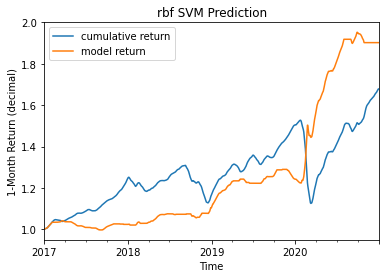

In [5]:
print(f"SVM best parameters: {svm.best_params_}\n")

print("Regression Metrics:")
to_plot = pd.DataFrame(y_scaler.inverse_transform(y_test),
                       columns=target_columns, index=y_test.index)
to_plot.loc[:, [n + "_PRED" for n in target_columns]] = y_scaler.inverse_transform(pred_test)
to_plot["cumulative return"] = (to_plot["SPY_1MRET"]/30 + 1).cumprod()
to_plot["model return"] = ((to_signal(to_plot["SPY_1MRET_PRED"], e=0.01) * to_plot["SPY_1MRET"]/30) + 1).cumprod()
to_plot.loc[:, ["cumulative return", "model return"]].plot(title=f"{svm.best_params_['kernel']} SVM Prediction")
plt.xlabel("Time")
plt.ylabel("1-Month Return (decimal)")
# save the above figure
# plt.show()
plt.savefig("svm_regression.jpeg")

print(f"true returns standard deviation: {np.std(to_plot.SPY_1MRET)}\n"
      f"MSE: {median_absolute_error(to_plot.SPY_1MRET, to_plot.SPY_1MRET_PRED)}\n"
      f"MAE: {mean_squared_error(to_plot.SPY_1MRET, to_plot.SPY_1MRET_PRED)}\n")

print("Classification Metrics:")
# evaluate the prediction as a classification problem
classification_metrics(y_test, pred_test, e=0.01)

# Random Forest Regression

In [6]:
# Use PredefinedSplit in GridSearchCV
param_grid = {
    "n_estimators": [175, 200, 225],
    # "criterion": ["mse", "mae"],
    "criterion": ["mae"],
    "oob_score": [True, False]}
rand_forest = GridSearchCV(estimator=RandomForestRegressor(bootstrap=True, n_jobs=-1),
                           cv=split, param_grid=param_grid, scoring="explained_variance", n_jobs=-1)

# scale all data based on the training set (excluding the validation set)
X_scaler = RobustScaler()
y_scaler = StandardScaler()
X_scaler.fit(market_data["X_train"])
y_scaler.fit(market_data["y_train"])

X_train = pd.DataFrame(X_scaler.transform(market_data["X_train"]), index=market_data["X_train"].index, columns=feature_columns)
y_train = pd.DataFrame(y_scaler.transform(market_data["y_train"]), index=market_data["y_train"].index, columns=target_columns)
X_test = pd.DataFrame(X_scaler.transform(market_data["X_test"]), index=market_data["X_test"].index, columns=feature_columns)
y_test = pd.DataFrame(y_scaler.transform(market_data["y_test"]), index=market_data["y_test"].index, columns=target_columns)

rand_forest.fit(X_train, np.array(y_train).ravel())
pred_test = rand_forest.predict(X_test).reshape(-1, 1)

Random Forest best parameters: {'criterion': 'mae', 'n_estimators': 175, 'oob_score': True}

Regression Metrics:
true returns standard deviation: 0.05733496649755508
MSE: 0.036503359206472005
MAE: 0.007528237001669803

Classification Metrics:
Confusion Matrix
[[257  34 717]
 [  3   0  11]
 [ 77   7 355]]
Accuracy            = 0.4189
F1-Score (Micro)    = 0.4189
F1-Score (Macro)    = 0.2829
F1-Score (Weighted) = 0.4038



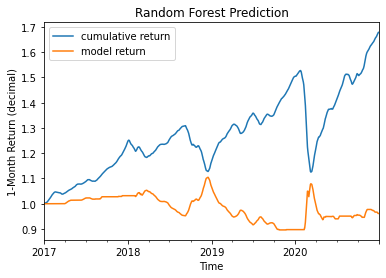

In [7]:
print(f"Random Forest best parameters: {rand_forest.best_params_}\n")

print("Regression Metrics:")
to_plot = pd.DataFrame(y_scaler.inverse_transform(y_test),
                       columns=target_columns, index=y_test.index)
to_plot.loc[:, [n + "_PRED" for n in target_columns]] = y_scaler.inverse_transform(pred_test)
to_plot["cumulative return"] = (to_plot["SPY_1MRET"]/30 + 1).cumprod()
to_plot["model return"] = ((to_signal(to_plot["SPY_1MRET_PRED"], e=0.01) * to_plot["SPY_1MRET"]/30) + 1).cumprod()
to_plot.loc[:, ["cumulative return", "model return"]].plot(title="Random Forest Prediction")
plt.xlabel("Time")
plt.ylabel("1-Month Return (decimal)")
# save the above figure
# plt.show()
plt.savefig("random_forest.jpeg")

print(f"true returns standard deviation: {np.std(to_plot.SPY_1MRET)}\n"
      f"MSE: {median_absolute_error(to_plot.SPY_1MRET, to_plot.SPY_1MRET_PRED)}\n"
      f"MAE: {mean_squared_error(to_plot.SPY_1MRET, to_plot.SPY_1MRET_PRED)}\n")

print("Classification Metrics:")
# evaluate the prediction as a classification problem
classification_metrics(y_test, pred_test, e=0.01)

# AdaBoost Regression

In [8]:
# Use PredefinedSplit in GridSearchCV
param_grid = {
    # "base_estimator": [ExtraTreesRegressor(max_depth=5), DecisionTreeRegressor(max_depth=3)],
    "base_estimator": [DecisionTreeRegressor(max_depth=3), DecisionTreeRegressor(max_depth=5)],
    "n_estimators": [200, 300, 400, 500],
    "loss": ["linear", "square"]}
adaboost = GridSearchCV(estimator=AdaBoostRegressor(),
                        cv=split, param_grid=param_grid, scoring="explained_variance", n_jobs=-1)

# scale all data based on the training set (excluding the validation set)
X_scaler = RobustScaler()
y_scaler = StandardScaler()
X_scaler.fit(market_data["X_train"])
y_scaler.fit(market_data["y_train"])

X_train = pd.DataFrame(X_scaler.transform(market_data["X_train"]), index=market_data["X_train"].index, columns=feature_columns)
y_train = pd.DataFrame(y_scaler.transform(market_data["y_train"]), index=market_data["y_train"].index, columns=target_columns)
X_test = pd.DataFrame(X_scaler.transform(market_data["X_test"]), index=market_data["X_test"].index, columns=feature_columns)
y_test = pd.DataFrame(y_scaler.transform(market_data["y_test"]), index=market_data["y_test"].index, columns=target_columns)

adaboost.fit(X_train, np.array(y_train).ravel())
pred_test = rand_forest.predict(X_test).reshape(-1, 1)

AdaBoost best parameters: {'base_estimator': DecisionTreeRegressor(max_depth=5), 'loss': 'square', 'n_estimators': 500}

Regression Metrics:
true returns standard deviation: 0.05733496649755508
MSE: 0.036503359206472
MAE: 0.007528237001669803

Classification Metrics:
Confusion Matrix
[[257  34 717]
 [  3   0  11]
 [ 77   7 355]]
Accuracy            = 0.4189
F1-Score (Micro)    = 0.4189
F1-Score (Macro)    = 0.2829
F1-Score (Weighted) = 0.4038



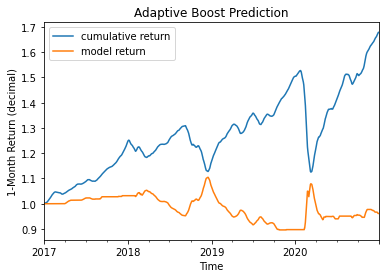

In [9]:
print(f"AdaBoost best parameters: {adaboost.best_params_}\n")

print("Regression Metrics:")
to_plot = pd.DataFrame(y_scaler.inverse_transform(y_test),
                       columns=target_columns, index=y_test.index)
to_plot.loc[:, [n + "_PRED" for n in target_columns]] = y_scaler.inverse_transform(pred_test)
to_plot["cumulative return"] = (to_plot["SPY_1MRET"]/30 + 1).cumprod()
to_plot["model return"] = ((to_signal(to_plot["SPY_1MRET_PRED"], e=0.01) * to_plot["SPY_1MRET"]/30) + 1).cumprod()
to_plot.loc[:, ["cumulative return", "model return"]].plot(title="Adaptive Boost Prediction")
plt.xlabel("Time")
plt.ylabel("1-Month Return (decimal)")
# save the above figure
# plt.show()
plt.savefig("adaboost.jpeg")

print(f"true returns standard deviation: {np.std(to_plot.SPY_1MRET)}\n"
      f"MSE: {median_absolute_error(to_plot.SPY_1MRET, to_plot.SPY_1MRET_PRED)}\n"
      f"MAE: {mean_squared_error(to_plot.SPY_1MRET, to_plot.SPY_1MRET_PRED)}\n")

print("Classification Metrics:")
# evaluate the prediction as a classification problem
classification_metrics(y_test, pred_test, e=0.01)

